In [2]:
import sys
plist = ['/Applications/NEURON/lib/python']
for pd in plist:
    if pd in sys.path:
        sys.path.remove(pd)

In [3]:
from neuron import h, gui, rxd
from neuron.units import mV

h.load_file("stdrun.hoc")
h.load_file("import3d.hoc")

cell = h.Import3d_SWC_read()
cell.input("c91662.CNG.swc")
h.Import3d_GUI(cell, 0)
i3d = h.Import3d_GUI(cell, 0)
i3d.instantiate(None)

for sec in h.allsec():
    sec.nseg = 1+2*int(sec.L/20)

soma = h.soma[0]

def my_initial(node):
    return 2*h.tanh(h.distance(soma(0.5),node)/1000.0) 

cyt = rxd.Region(h.allsec(),name='cyt',nrn_region='i')
ca = rxd.Species(cyt,name='ca',charge=2,initial=my_initial)

h.finitialize(-65 * mV)

1.0

<Axis3DWithNEURON:>

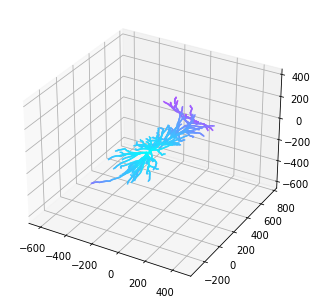

In [4]:
import matplotlib.pyplot as plt

ps = h.PlotShape(False)
ps.variable(ca[cyt])
ps.scale(0,2)
ps.plot(plt)